#**IMBD sentiment Analysis using Pytorch-LSTM**

## General steps when working on a NLP project


1.   **Data Collection**
2.   **Data Preprocessing:**


*   Text Cleaning: Remove unwanted characters, HTML tags, or special symbols.

*   Normalization: Convert text to a uniform format (e.g., lowercasing).

*   Tokenization: Split text into individual words or phrases (tokens).

*   Stopword Removal: Remove common words (like "the," "is") that may not add significant meaning.

*   Lemmatization/Stemming: Reduce words to their base or root form to standardize them.


3.   **Exploratory Data Analysis (EDA):**
*   Visualize and analyze the data to understand its characteristics (e.g., word frequency, sentiment distribution).


4.   **Feature Extraction/Engineering:**

Choose Features: Determine which features (text representations) to use, such as:

*   Bag of Words
*   Word Embeddings (e.g., Word2Vec, GloVe, BERT)


5.   **Model Selection:**


*   Choose Algorithms: Select appropriate NLP models based on the problem (e.g., logistic regression, LSTM, transformers).
*   Consider Pre-trained Models: Utilize pre-trained models (like BERT or GPT) if applicable to save time and improve performance.


6.   **Model Training:**


*   Split the Data: Divide your data into training, validation, and test sets.
*   Train the Model: Use the training set to train your selected models.
* Tune Hyperparameters: Optimize model performance by adjusting hyperparameters.

7. **Model Evaluation:**
* Evaluate Performance: Use metrics appropriate for your task (accuracy, precision, recall, F1 score) to assess the model's performance on the validation set.
* Test on Unseen Data: Validate the model using the test set to ensure it generalizes well.













In [11]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn

In [159]:
!mkdir scripts

In [12]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nouranmostafa25","key":"81b9aed9da2c20b622c3f78c9bf11caa"}'}

In [16]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [18]:
!kaggle kernels pull lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews

Source code downloaded to /content/sentiment-analysis-of-imdb-movie-reviews.ipynb


In [19]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [20]:
import zipfile

with zipfile.ZipFile("imdb-dataset-of-50k-movie-reviews.zip", "r") as zip_ref:
    zip_ref.extractall("imdb_data")  # Unzips files to a folder called imdb_data


In [22]:
df = pd.read_csv('imdb_data/IMDB Dataset.csv')

df.to_csv('imdb_data/imdb_dataset.csv')

In [23]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Data Preprocessing

Text preprocessing is a crucial step in Natural Language Processing (NLP) that involves cleaning and transforming raw text data into a format suitable for analysis and machine learning models. This process is vital for enhancing the performance and accuracy of NLP tasks.

One key reason for text preprocessing is to remove noise and irrelevant information from the text, such as special characters, punctuation, and stop words. This helps in reducing the dimensionality of the data and improves the efficiency of subsequent analysis. Additionally, text normalization techniques, such as stemming and lemmatization, ensure that words are represented in their base or root form, reducing redundancy and enhancing the consistency of the dataset.

For example, consider the sentence: "The quick brown foxes are jumping over the lazy dogs." After preprocessing, it might become: "quick brown fox jump lazy dog." This simplification facilitates better feature extraction and enables NLP models to focus on the essential linguistic elements.
Moreover, text preprocessing addresses issues like :


* Lowercase letters.
* Removing HTML tags.
* Removing URLs.
* Removing punctuation.
* Chat Words Treatment.
* Spelling Correction.
* Removing stop words
* Handling Emojies
* Tokenization
* Stemming
* Lemmatization

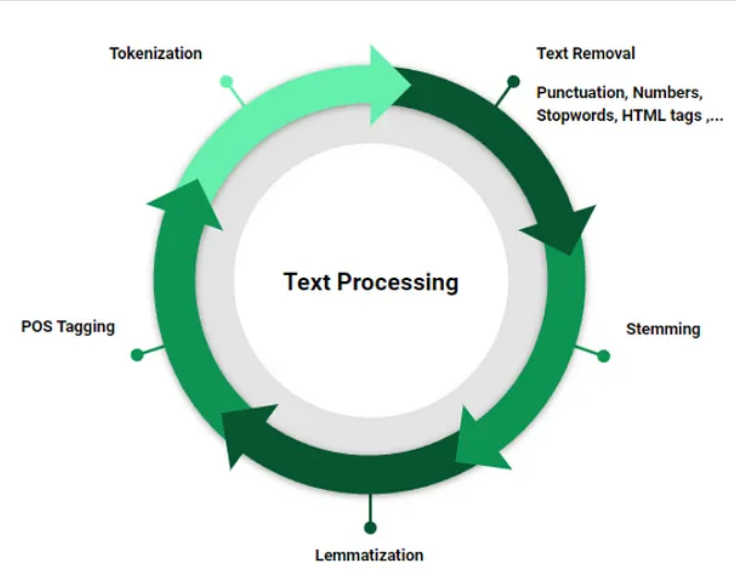



In [24]:
df['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [25]:
df['review'] = df['review'].str.lower()

In [26]:
df['review'][3]

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [27]:
import re

# Function to remove HTML Tags
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [28]:
# Apply Function to Remove HTML Tags in our Dataset Colum Review.
df['review'] = df['review'].apply(remove_html_tags)

In [29]:
text = "<html><body><p> Movie 1</p><p> Actor - Aamir Khan</p><p> Click here to <a href='http://google.com'>download</a></p></body></html>"

In [30]:
remove_html_tags(text)

' Movie 1 Actor - Aamir Khan Click here to download'

In [31]:
# Here We also Use Regular Expressions to Remove URLs from Text or Whole Corpus.
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)


In [32]:
df['review'] = df['review'].apply(remove_url)

In [33]:
text1 = 'Check out my notebook https://www.kaggle.com/campusx/notebook8223fc1abb'
print(remove_url(text1))

Check out my notebook 


In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
punc = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', punc))

In [36]:
df['review'] = df['review'].apply(remove_punc)

Removing stop words is crucial to enhance the quality and efficiency of analysis.

Stop words are common words like "the," "is," and "and," which appear frequently in text but carry little semantic meaning.

 By eliminating stop words, we reduce noise in the data, decrease the dimensionality of the dataset, and improve the accuracy of NLP tasks such as sentiment analysis, topic modeling, and text classification.

 This process streamlines the analysis by focusing on the significant words that carry more meaningful information, leading to better model performance and interpretation of results.

In [37]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
from nltk.corpus import stopwords

In [39]:
stopword = stopwords.words('english')

In [40]:
def remove_stopwords(text):
    new_text = []

    for word in text.split():
        if word in stopword:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [41]:
df['review'].apply(remove_stopwords)

,review
0,one reviewers mentioned watching 1 oz e...
1,wonderful little production filming techniqu...
2,thought wonderful way spend time hot s...
3,basically theres family little boy jake thi...
4,petter matteis love time money visually s...
...,...
49995,thought movie right good job wasnt crea...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary schoo...
49998,im going disagree previous comment side ...


In [42]:
df['len_review'] = df['review'].apply(lambda x:len(x))




*  This can be useful for analyzing review lengths, filtering out very short or very long reviews, or as a feature in machine learning models.



In [43]:
all_text2 = df['review'].tolist()

This list, all_text2, contains each review as an element and can be useful if you need to:





*   Perform preprocessing on all reviews at once.
*   Feed the reviews into a natural language processing model that requires list input.


*   Combine all reviews into a single string for tokenization or word frequency analysis.




In [44]:
df.head()

,review,sentiment,len_review
0,one of the other reviewers has mentioned that ...,positive,1665
1,a wonderful little production the filming tech...,positive,936
2,i thought this was a wonderful way to spend ti...,positive,874
3,basically theres a family where a little boy j...,negative,688
4,petter matteis love in the time of money is a ...,positive,1237


# Tokenization

Tokenization is a crucial step in NLP text preprocessing where text is segmented into smaller units, typically words or subwords, known as tokens. This process is essential for several reasons. Firstly, it breaks down the text into manageable units for analysis and processing. Secondly, it standardizes the representation of words, enabling consistency in language modeling tasks. Additionally, tokenization forms the basis for feature extraction and modeling in NLP, facilitating tasks such as sentiment analysis, named entity recognition, and machine translation. Overall, tokenization plays a fundamental role in preparing text data for further analysis and modeling in NLP applications.

We Generally do 2 Type of tokenization:


1.   Word tokenization
2.   Sentence Tokenization




--> Create String to Int mapping dictionary

In [45]:
from collections import Counter
all_text2 = ' '.join(all_text2) # combines all reviews into a single string, with each review separated by a space.
# create a list of words
words = all_text2.split() # splits the text into individual words

In [46]:
# Count all the words using Counter Method
count_words = Counter(words) # counts each unique word's occurrences

total_words = len(words)
sorted_words = count_words.most_common(total_words) # returns a list of tuples sorted by frequency in descending order. Each tuple contains a word and its frequency.

In [47]:
stoi = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
itos = {i+1:w for i, (w,c) in enumerate(sorted_words)}

In [48]:
reviews_split = df['review'].tolist()

### Encode words

In [49]:
# Encode each review as a list of integers
reviews_int = [] # store each encoded review as a list of integers.
for review in reviews_split:
    # Convert each word in the review to an integer, defaulting to 0 if word is not in stoi
    r = [stoi.get(w, 0) for w in review.split()]  # Using get() to handle unknown words gracefully
    reviews_int.append(r)

print (reviews_int[:3])

[[27, 4, 1, 77, 1929, 42, 1058, 11, 100, 144, 39, 507, 3340, 393, 457, 25, 3147, 33, 22, 204, 13, 10, 6, 593, 46, 582, 14, 7542, 87, 145, 11, 3221, 68, 41, 3340, 12, 28, 5511, 2, 14966, 131, 4, 584, 60, 282, 7, 204, 35, 1, 661, 137, 1724, 68, 10, 6, 20, 3, 117, 15, 1, 8155, 5707, 38, 11587, 10, 117, 2479, 54, 5961, 14, 5619, 5, 1457, 381, 38, 584, 28, 6, 3383, 7, 1, 351, 337, 4, 1, 61027, 6, 461, 3340, 13, 11, 6, 1, 11254, 344, 5, 1, 15573, 6801, 2539, 1056, 61028, 8, 2604, 1365, 19, 24633, 533, 32, 4683, 2496, 4, 1, 1197, 112, 30, 1, 7006, 24, 2952, 12693, 2, 405, 61029, 37, 17028, 6, 20, 317, 19, 1, 5027, 3694, 533, 6, 340, 5, 83356, 8284, 39961, 14967, 5116, 7735, 2439, 2, 17029, 61030, 328, 9083, 7324, 13108, 2, 8535, 33911, 22, 108, 223, 21281, 56, 124, 1, 267, 1291, 4, 1, 117, 6, 663, 5, 1, 185, 11, 8, 260, 112, 77, 254, 547, 2965, 818, 177, 1262, 4291, 15, 2473, 1092, 818, 1400, 818, 83357, 146, 969, 180, 1, 87, 393, 9, 119, 200, 3221, 68, 13, 37, 1569, 8, 12, 2188, 9, 395, 124,

### Why did we use .get():

When encoding text data, there may be words in review that don't exist in the stoi dictionary. This could happen if:
*   The test or validation data has words not seen in the training data.
*   There are typos or out-of-vocabulary (OOV) words.



In [50]:
df.head()

,review,sentiment,len_review
0,one of the other reviewers has mentioned that ...,positive,1665
1,a wonderful little production the filming tech...,positive,936
2,i thought this was a wonderful way to spend ti...,positive,874
3,basically theres a family where a little boy j...,negative,688
4,petter matteis love in the time of money is a ...,positive,1237


### Encode Labels

In [51]:
labels_split = df['sentiment'].tolist()

In [52]:
encoded_labels = [1 if label =='positive' else 0 for label in labels_split]
encoded_labels = np.array(encoded_labels)

In [53]:
encoded_labels[0:100]

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [54]:
encoded_labels.shape

(50000,)

In [55]:
# Analyze Reviews Length
# Calculate the length of each review in terms of the number of integers (encoded words)
review_lens = Counter([len(x) for x in reviews_int])

# Count and print the number of zero-length reviews (if any)
print("Zero-length reviews: {}".format(review_lens[0]))

# Find and print the maximum review length
print("Maximum review length: {}".format(max(review_lens)))


Zero-length reviews: 0
Maximum review length: 2450


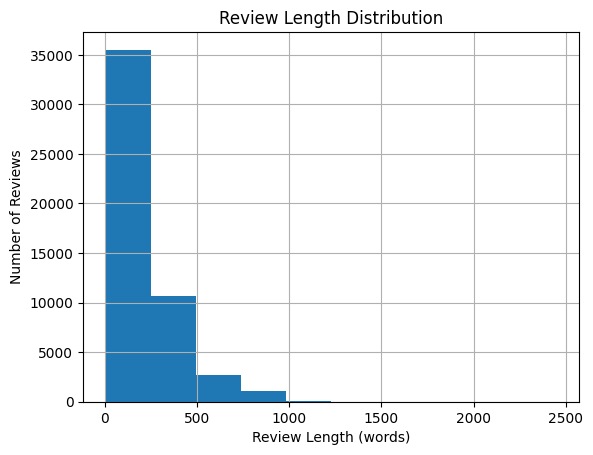

,0
count,50000.000000
mean,226.252620
std,167.624809
min,4.000000
25%,124.000000
50%,170.000000
75%,274.000000
max,2450.000000


In [56]:
# Plot a histogram of review lengths to visualize the distribution
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.title('Review Length Distribution')
plt.xlabel('Review Length (words)')
plt.ylabel('Number of Reviews')
plt.show()

# Display summary statistics of review lengths
pd.Series(reviews_len).describe()

In [57]:
# remove outliers
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
encoded_labels = [ encoded_labels[i] for i, l in enumerate(reviews_len) if l> 0 ]

This code removes reviews that are considered outliers—in this case, reviews with a length of 0 (zero-length reviews), which may be problematic for model training.

In [58]:
# Padding and truncating
def pad_features(reviews_int, seq_length):
    """
    Pads or truncates each review to a fixed sequence length.
    If the review is shorter than seq_length, it adds leading zeros.
    If the review is longer than seq_length, it trims the excess.
    """
    # Initialize a 2D array of zeros
    features = np.zeros((len(reviews_int), seq_length), dtype=int)

    # Pad or truncate each review
    for i, review in enumerate(reviews_int):
        # Take the last `seq_length` elements if the review is longer, else use entire review
        features[i, -len(review):] = review[:seq_length]

    return features


The for loop iterates over each review:


*   If the review length is less than seq_length, it will fill the beginning of the row with zeros (padding).

*   If the review length exceeds seq_length, it takes only the first seq_length elements from the review.
*   The assignment features [i, -len(review):] = review[:seq_length] ensures that the last part of the row in features will contain the review data, effectively padding with zeros to the left.



In [59]:
features = pad_features(reviews_int,200)

In [60]:
print (features[:10,:])

[[   27     4     1 ...   119   200  3221]
 [    0     0     0 ...  1889    72   222]
 [    0     0     0 ...    63    14   330]
 ...
 [    0     0     0 ...    19     1   942]
 [    0     0     0 ...  9941 44449    59]
 [    0     0     0 ...   410 44450  1206]]


In [61]:
len_feat = len(features)
split_frac = 0.8 # 80% of the data will be used for the training set

# Training, Validation, Test Dataset Split

In [62]:
# Training Set: 80% of the data
train_x = features[0:int(split_frac*len_feat)]
train_y = encoded_labels[0:int(split_frac*len_feat)]

remaining_x = features[int(split_frac*len_feat):]
remaining_y = encoded_labels[int(split_frac*len_feat):]

# Validation Set: 10% of the data
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]

# Testing Set: 10% of the data
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]



1.   **Training Set:** Used to train the model. It helps the model learn the underlying patterns in the data.

1.   **Validation Set:** Used to tune hyperparameters and select the best model. It provides feedback on the model's performance during the training process without using the test data.
2.   **Testing Set:** Used to evaluate the final model's performance after training and validation. It ensures that the model generalizes well to unseen data.



In [63]:
type(test_y)

list

In [64]:
train_y = np.array(train_y)
test_y = np.array(test_y)
valid_y = np.array(valid_y)

### Dataloaders and Batching

In [65]:
import torch
from torch.utils.data import TensorDataset, DataLoader

train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

batch_size = 50 # how many samples will be processed at a time during training

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)



*   **TensorDataset** is a convenient way to create a dataset from PyTorch tensors. It allows you to easily pair input features (like train_x) with their corresponding labels (like train_y).

*   **DataLoader** provides an iterable over a dataset, allowing you to easily manage how data is fed into your model during training and evaluation.



# visualize the shape and content of a single batch of training data

In [66]:
# Obtain one batch of training data from the train_loader
dataiter = iter(train_loader)  # Create an iterator from the DataLoader
sample_x, sample_y = next(dataiter)  # Retrieve the next batch of features (sample_x) and labels (sample_y)

# Print the size of the input features tensor
print('Sample input size: ', sample_x.size())  # Output will be (batch_size, seq_length)
# Print the actual input features for the current batch
print('Sample input: \n', sample_x)
print()  # Print a newline for better readability

# Print the size of the labels tensor
print('Sample label size: ', sample_y.size())  # Output will be (batch_size,)
# Print the actual labels corresponding to the input features
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[    0,     0,     0,  ...,  1740,    48,    18],
        [    8,   810,    14,  ...,     6,    20,   593],
        [    0,     0,     0,  ...,   112,    21,  1670],
        ...,
        [    0,     0,     0,  ...,  3033,  2727,    59],
        [    0,     0,     0,  ...,     6,    39,    11],
        [    0,     0,     0,  ..., 10249,    15,    21]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 1])


### Define the LSTM Network Architecture

Long Short-Term Memory (LSTM) networks are a special type of neural network designed to understand sequences of data, like sentences in text, stock prices over time, or audio signals.
### Why Use LSTMs?


*   Regular neural networks aren’t good at remembering information from earlier parts of a sequence when predicting the next part. This can be a problem when context is essential, like when understanding a sentence or tracking trends over time.
*   LSTMs are designed specifically to handle this type of sequential information, making them popular for tasks involving time series, text, and other data that comes in sequences.




### How LSTMs Work


*   **Neurons That "Remember":** In an LSTM, each "neuron" or unit is more than just a simple cell. Each unit has a memory cell that can "remember" values over long sequences, allowing it to keep track of important information while "forgetting" irrelevant parts.

*   **Gatse:** LSTMs have mechanisms called "gates" that control what information to keep, what to update, and what to forget. Think of these as switches:


1.   **Forget Gate:** Decides what information to discard.

1.   **Input Gate:** Determines what new information to store.
2.   **Output Gate:** Chooses what to output from the memory to influence the next prediction.



*   By combining these gates, LSTMs can learn which information is important to remember and which can be safely forgotten.






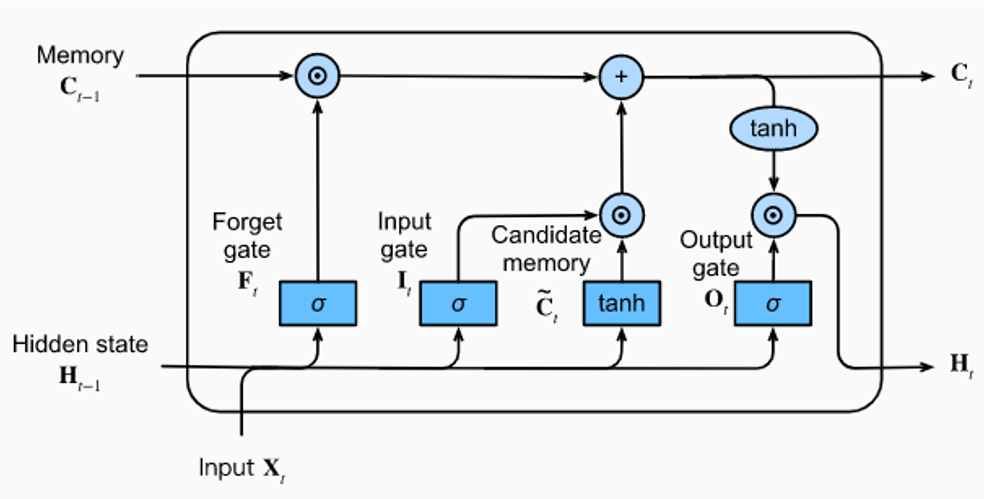

### Forget Gate
The information that is no longer useful in the cell state is removed with the forget gate. Two inputs xt (input at the particular time) and ht-1 (previous cell output) are fed to the gate and multiplied with weight matrices followed by the addition of bias. The resultant is passed through an activation function which gives a binary output. If for a particular cell state the output is 0, the piece of information is forgotten and for output 1, the information is retained for future use. The equation for the forget gate is:


f
t
=
σ
(
W
_
f
⋅
[
h
_
t
−
1
,
x
_
t
]
+
b
_
f
)


 where:

 W_f represents the weight matrix associated with the forget gate.

[h_t-1, x_t] denotes the concatenation of the current input and the previous hidden state.

b_f is the bias with the forget gate.

σ is the sigmoid activation function.


<img src="https://media.geeksforgeeks.org/wp-content/uploads/20231123171949/newContent2.jpg" width="200" height="300">



### Input gate
The addition of useful information to the cell state is done by the input gate. First, the information is regulated using the sigmoid function and filter the values to be remembered similar to the forget gate using inputs ht-1 and xt. . Then, a vector is created using tanh function that gives an output from -1 to +1, which contains all the possible values from ht-1 and xt. At last, the values of the vector and the regulated values are multiplied to obtain the useful information. The equation for the input gate is:


i
t
=
σ
(
W
i
⋅
[
h
t
−
1
,
x
t
]
+
b
i
)

C
^
t
=
t
a
n
h
(
W
c
⋅
[
h
t
−
1
,
x
t
]
+
b
c
)

We multiply the previous state by ft, disregarding the information we had previously chosen to ignore. Next, we include it∗Ct. This represents the updated candidate values, adjusted for the amount that we chose to update each state value.

C
t
=
f
t
⊙
C
t
−
1
+
i
t
⊙
C
^
t

where

 ⊙ denotes element-wise multiplication

tanh is tanh activation function

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20240208104902/bruh.webp" width="400" height="300">

### Output gate
The task of extracting useful information from the current cell state to be presented as output is done by the output gate. First, a vector is generated by applying tanh function on the cell. Then, the information is regulated using the sigmoid function and filter by the values to be remembered using inputs
h
t−1
​
 and
x
t
 . At last, the values of the vector and the regulated values are multiplied to be sent as an output and input to the next cell. The equation for the output gate is:

o
t
=
σ
(
W
o
⋅
[
h
t
−
1
,
x
t
]
+
b
o
)

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20240208104902/bruh.webp" width="400" height="200">


In [160]:
%%writefile scripts/model_def.py

import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.

        Parameters:
        - vocab_size: Size of the vocabulary (number of unique words) used for embedding.
        - output_size: The number of classes we want to predict (e.g., 1 for binary classification).
        - embedding_dim: Dimensionality of the embedding layer (how many features to represent each word).
        - hidden_dim: Number of features in the hidden state of the LSTM (how much information it can hold).
        - n_layers: The number of stacked LSTM layers (how deep the network is).
        - drop_prob: Probability of dropping out units in the dropout layer to prevent overfitting.
        """
        super().__init__()  # Call the initializer of the parent class (nn.Module) to ensure that everything is set up properly.

        self.output_size = output_size  # Store output size
        self.n_layers = n_layers          # Store number of LSTM layers
        self.hidden_dim = hidden_dim      # Store hidden dimension size

        # Embedding layer to convert word indices into dense vectors
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # LSTM layer with specified parameters
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers,
                            dropout=drop_prob, batch_first=True)

        # Dropout layer to help prevent overfitting
        self.dropout = nn.Dropout(0.3)

        # Fully connected layer to produce output from LSTM outputs
        self.fc = nn.Linear(hidden_dim, output_size)

        # Sigmoid layer for output activation (to squash values between 0 and 1)
        self.sig = nn.Sigmoid()

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.

        Parameters:
        - x: Input batch of word indices.
        - hidden: The hidden state of the LSTM from the previous time step.

        Returns:
        - sig_out: The output probabilities for each input in the batch.
        - hidden: The hidden state for the next time step.
        """
        batch_size = x.size(0)  # Get the batch size from the input

        # Get the embeddings for the input word indices
        embeds = self.embedding(x)
        # Pass the embeddings through the LSTM layer, which processes the sequence of word embeddings and updates the hidden state.
        lstm_out, hidden = self.lstm(embeds, hidden)

        # Reshape lstm_out for the fully connected layer
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        # Apply dropout for regularization
        out = self.dropout(lstm_out)
        # Pass the output through the fully connected layer
        out = self.fc(out)
        # Apply the sigmoid activation function
        sig_out = self.sig(out)

        # Reshape the output to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1]  # Get the last output from the sequence

        # Return the last sigmoid output and the hidden state
        return sig_out, hidden

    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data  # Get the weight of the model to determine the device (CPU/GPU)

        if (train_on_gpu):  # Check if training on GPU
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),  # Initialize hidden state on GPU
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())  # Initialize cell state on GPU
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),  # Initialize hidden state on CPU
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())  # Initialize cell state on CPU

        return hidden  # Return the initialized hidden state, which will be used for processing the input sequences.


Writing scripts/model_def.py


### Summary of this code


*   **Embedding Layer:** Transforms word indices into dense vectors, allowing the model to understand words better.
*   **LSTM Layer:** Processes the sequence of embeddings, maintaining a hidden state that carries information across time steps.

*   **Dropout Layer:** Helps prevent overfitting by randomly dropping some units during training.

*   **Fully Connected Layer:** Produces the final output based on the information from the LSTM.
*   **Sigmoid Activation:** Squashes the output to a range of 0 to 1, suitable for binary classification.






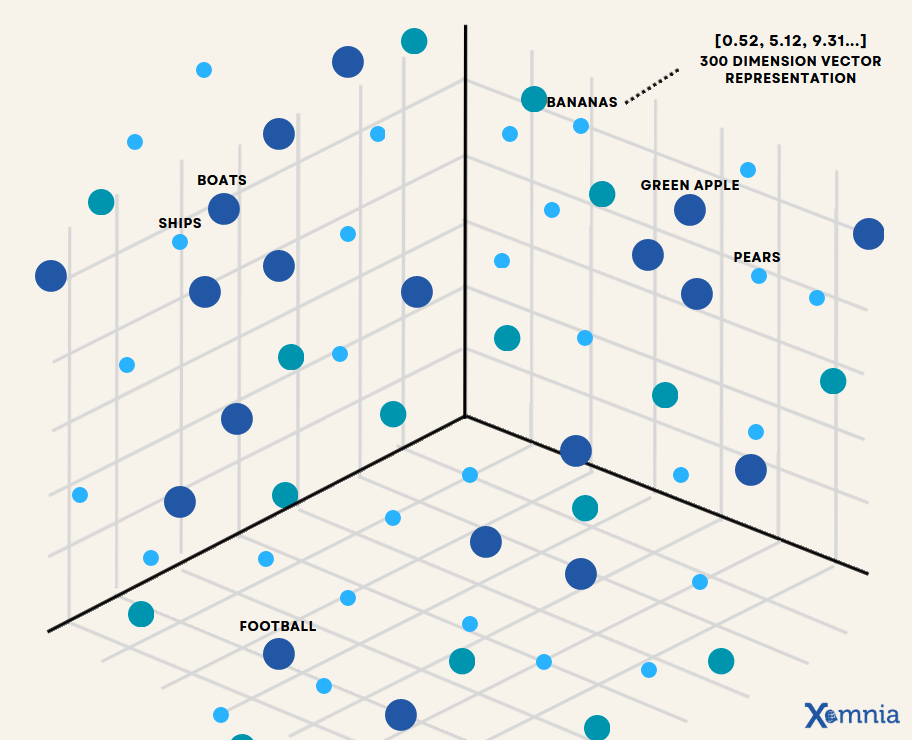

### Train the network

In [68]:
# Instantiate the model with hyperparams
vocab_size = len(stoi)+1 # +1 for the 0 padding
output_size = 1 # Positive or negative sentiment
embedding_dim = 400 # Each word in the vocabulary will be represented as a 400-dimensional vector.
hidden_dim = 256 # Number of hidden units in the LSTM layers.
n_layers = 2 # Number of stacked LSTM layers.
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentLSTM(
  (embedding): Embedding(222573, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [69]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


# Training Loop

Setting up the loss function and optimization method for training the SentimentLSTM model.

In [70]:
# loss and optimization functions
lr=0.001 # Size of the steps the optimizer takes in adjusting model weights during training

# loss function
criterion = nn.BCELoss() # Binary Cross-Entropy Loss

# optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

Training the model while displaying key metrics.

In [71]:
# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0 # Counts the number of training steps
print_every = 100 # Print loss every 100 batches
clip=5 # gradient clipping to avoid exploding gradients

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size) # Initialize hidden state at the start of each epoch

    # batch loop
    for inputs, labels in train_loader:
        counter += 1
        #print(counter)

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model (Forward pass)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step() # Update the weights

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size) # Reinitialize hidden state for validation
            val_losses = []
            net.eval() # Switch to evaluation mode (no gradient tracking)

            for inputs, labels in valid_loader:
                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Train Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/4... Step: 100... Train Loss: 0.627943... Val Loss: 0.650029
Epoch: 1/4... Step: 200... Train Loss: 0.713826... Val Loss: 0.634273
Epoch: 1/4... Step: 300... Train Loss: 0.578264... Val Loss: 0.590427
Epoch: 1/4... Step: 400... Train Loss: 0.619475... Val Loss: 0.566009
Epoch: 1/4... Step: 500... Train Loss: 0.567993... Val Loss: 0.533510
Epoch: 1/4... Step: 600... Train Loss: 0.401918... Val Loss: 0.507007
Epoch: 1/4... Step: 700... Train Loss: 0.464233... Val Loss: 0.420293
Epoch: 1/4... Step: 800... Train Loss: 0.294842... Val Loss: 0.415246
Epoch: 2/4... Step: 900... Train Loss: 0.270894... Val Loss: 0.408655
Epoch: 2/4... Step: 1000... Train Loss: 0.326965... Val Loss: 0.392517
Epoch: 2/4... Step: 1100... Train Loss: 0.378470... Val Loss: 0.386721
Epoch: 2/4... Step: 1200... Train Loss: 0.355002... Val Loss: 0.390175
Epoch: 2/4... Step: 1300... Train Loss: 0.397751... Val Loss: 0.388033
Epoch: 2/4... Step: 1400... Train Loss: 0.409078... Val Loss: 0.419433
Epoch: 2/4... S

Evaluating the trained model on the test dataset, calculating the average test loss, and computing the accuracy.

In [72]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0 # Counter to track the number of correct predictions

# init hidden state
h = net.init_hidden(batch_size)

net.eval() # Set the model to evaluation mode to disable dropout layers
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h]) # Reset hidden state for each batch

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()

    # Get model predictions and new hidden state
    output, h = net(inputs, h)

    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())  # Calculate the loss for the batch
    test_losses.append(test_loss.item())  # Store the loss value

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer

    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.454
Test accuracy: 0.845


In [73]:
# negative test review
test_review_neg = 'The worst movie I have seen; acting was terrible and I want my money back. This movie had bad acting and the dialogue was slow.'

In [165]:
%%writefile scripts/preprocess.py

def preprocess(review, stoi, reviews_int=None):
    """
    Preprocess the review text by converting it to lowercase,
    splitting it into words, and mapping words to integers using the stoi dictionary.

    Args:
    review (str): The text of the review.
    stoi (dict): A dictionary mapping words to integer values.
    reviews_int (list): A list to store integer representations of the reviews (optional).

    Returns:
    list: A list of integers representing the words in the review.
    """
    # If reviews_int is not provided, initialize it as an empty list
    if reviews_int is None:
        reviews_int = []

    review = review.lower()  # Convert the review to lowercase for consistency
    word_list = review.split()  # Split the review into individual words
    num_list = []  # Initialize an empty list to store the integer representations of words

    for word in word_list:
        if word in stoi.keys():  # Check if the word exists in the stoi dictionary
            num_list.append(stoi[word])  # Append the integer corresponding to the word

    # Append the processed review's integer list to reviews_int
    reviews_int.append(num_list)

    return num_list  # Return the list of integers for the current review

Writing scripts/preprocess.py


In [166]:
%%writefile scripts/predict.py

def predict(net, test_review, sequence_length=200):
    ''' Prints out whether a give review is predicted to be
        positive or negative in sentiment, using a trained model.

        params:
        net - A trained net
        test_review - a review made of normal text and punctuation
        sequence_length - the padded length of a review
        '''
    #change the reviews to sequence of integers
    int_rev = preprocess(test_review, stoi)
    #pad the reviews as per the sequence length of the feature
    features = pad_features(int_rev, seq_length=sequence_length)

    #changing the features to PyTorch tensor
    features = torch.from_numpy(features)

    #pass the features to the model to get prediction
    net.eval()
    # Get the batch size from features shape
    batch_size = features.shape[0]
    val_h = net.init_hidden(batch_size) # Initialize hidden state with correct batch size

    val_h = tuple([each.data for each in val_h])

    if(train_on_gpu):
        features = features.cuda()

    output, val_h = net(features, val_h)

    # Get the prediction for the entire review by taking the mean prediction
    pred = torch.round(torch.mean(output))

    #mapping the numeric values to postive or negative
    output = "Positive" if pred.item() == 1 else "Negative"

    # print custom response based on whether test_review is pos/neg
    return output

Overwriting scripts/predict.py


In [167]:
def pad_features(reviews_int, seq_length):
    """
    Pads or truncates input reviews to a fixed length.
    Supports both single review and batch of reviews.
    """
    # Getting the correct rows x cols shape
    features = np.zeros((1 if isinstance(reviews_int[0], int) else len(reviews_int), seq_length), dtype=int)

    # For each review, I grab that review and
    if isinstance(reviews_int[0], int):  # Check if reviews_int is a list of integers (single review
        truncated = np.array(reviews_int)[:seq_length]  # If so, treat it as a single review
        features[0, -len(truncated):] = truncated   # Pad or truncate the review
    else:  # Otherwise, treat it as a list of reviews
        for i, review in enumerate(reviews_int):
            # Take the last `seq_length` elements if the review is longer, else use entire review
            truncated = np.array(review)[:seq_length]
            features[i, -len(truncated):] = truncated   # Pad or truncate the review

    return features


In [168]:
# positive test review
test_review_pos = 'The movie was fantastic and thrilling!.'

In [169]:
seq_length = 200
predict(net, test_review_pos, seq_length)

'Positive'

In [171]:
import os

# Create the 'model' directory
os.makedirs('model', exist_ok=True)

# Now save the model's state dictionary
torch.save(net.state_dict(), 'model/trained_model.pt')

In [156]:
from IPython.display import HTML
import ipywidgets as widgets
from IPython.display import display

# Create input widgets
review_input = widgets.Textarea(
    placeholder="Enter your movie review here...",
    description="Review:",
    layout=widgets.Layout(width='600px', height='100px'),
    disabled=False
)

predict_button = widgets.Button(description="Predict Sentiment", button_style='info')
prediction_output = widgets.Output()

# Define button click handler
def on_button_click(b):
    with prediction_output:
        prediction_output.clear_output()
        review = review_input.value.strip()
        if review:
            sentiment = predict(net, review, sequence_length=200)

            # Set color based on sentiment
            color = "green" if sentiment == "Positive" else "red"

            # Format HTML response
            html_result = f"""
            <div style="font-size:16px;">
                <strong>Predicted Sentiment:</strong> <span style="color:{color}; font-weight:bold;">{sentiment}</span><br>
            </div>
            """
            display(HTML(html_result))
        else:
            display(HTML("<span style='color:gray;'>Please enter a review.</span>"))

# Attach event
predict_button.on_click(on_button_click)

# Display widgets
display(review_input, predict_button, prediction_output)


Textarea(value='', description='Review:', layout=Layout(height='100px', width='600px'), placeholder='Enter you…

Button(button_style='info', description='Predict Sentiment', style=ButtonStyle())

Output()